In [63]:
# Initial imports
import os
from pathlib import Path
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

In [64]:
load_dotenv("../../WBF.env")

True

In [65]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)

str

In [66]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [67]:
end = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()
start = pd.Timestamp("2019-11-30", tz="America/New_York").isoformat()
timeframe = "1D"
tickers = ['MSFT', 'DIS', 'NFLX', 'MA', 'XOM']

In [68]:
stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

stock_df.index = stock_df.index.date

In [69]:
stock_closing_prices_df = pd.DataFrame()

stock_closing_prices_df["MSFT"] = stock_df["MSFT"]["close"]
stock_closing_prices_df["DIS"] = stock_df["DIS"]["close"]
stock_closing_prices_df["NFLX"] = stock_df["NFLX"]["close"]
stock_closing_prices_df["MA"] = stock_df["MA"]["close"]
stock_closing_prices_df["XOM"] = stock_df["XOM"]["close"]


In [70]:
stock_closing_prices_df["MovAvg20dMSFT"] = stock_closing_prices_df["MSFT"].rolling(window=20).mean()
stock_closing_prices_df["MovAvg20dDIS"] = stock_closing_prices_df["DIS"].rolling(window=20).mean()
stock_closing_prices_df["MovAvg20dNFLX"] = stock_closing_prices_df["NFLX"].rolling(window=20).mean()
stock_closing_prices_df["MovAvg20dMA"] = stock_closing_prices_df["MA"].rolling(window=20).mean()
stock_closing_prices_df["MovAvg20dXOM"] = stock_closing_prices_df["XOM"].rolling(window=20).mean()

In [71]:
stock_closing_prices_df["StDevMSFT"] = stock_closing_prices_df["MSFT"].rolling(window=20).std()
stock_closing_prices_df["StDevDIS"] = stock_closing_prices_df["DIS"].rolling(window=20).std()
stock_closing_prices_df["StDevNFLX"] = stock_closing_prices_df["NFLX"].rolling(window=20).std()
stock_closing_prices_df["StDevMA"] = stock_closing_prices_df["MA"].rolling(window=20).std()
stock_closing_prices_df["StDevXOM"] = stock_closing_prices_df["XOM"].rolling(window=20).std()

Text(0, 0.5, 'MSFT')

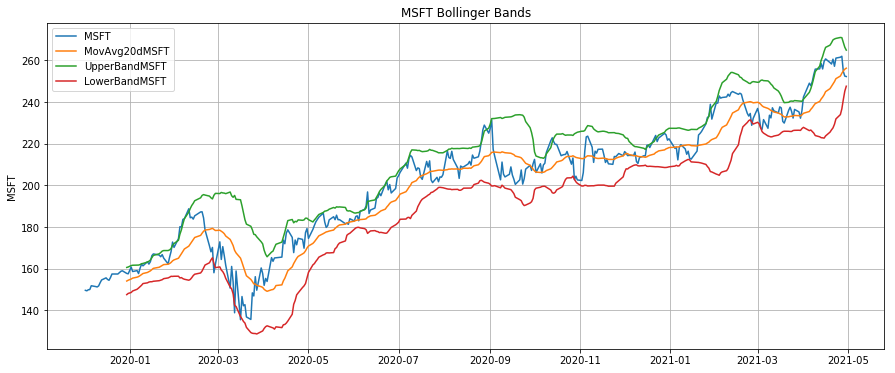

In [72]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandMSFT"] = stock_closing_prices_df["MovAvg20dMSFT"] + (stock_closing_prices_df["StDevMSFT"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandMSFT"] = stock_closing_prices_df["MovAvg20dMSFT"] - (stock_closing_prices_df["StDevMSFT"] * 2)

# Plotting
stock_closing_prices_df[["MSFT","MovAvg20dMSFT","UpperBandMSFT","LowerBandMSFT"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("MSFT Bollinger Bands")
plt.axis("tight")
plt.ylabel("MSFT")

Text(0, 0.5, 'DIS')

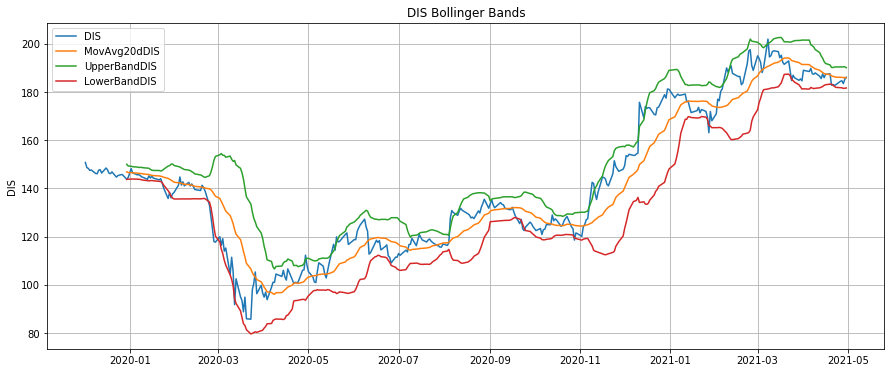

In [73]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandDIS"] = stock_closing_prices_df["MovAvg20dDIS"] + (stock_closing_prices_df["StDevDIS"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandDIS"] = stock_closing_prices_df["MovAvg20dDIS"] - (stock_closing_prices_df["StDevDIS"] * 2)

# Plotting
stock_closing_prices_df[["DIS","MovAvg20dDIS","UpperBandDIS","LowerBandDIS"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("DIS Bollinger Bands")
plt.axis("tight")
plt.ylabel("DIS")

Text(0, 0.5, 'MA')

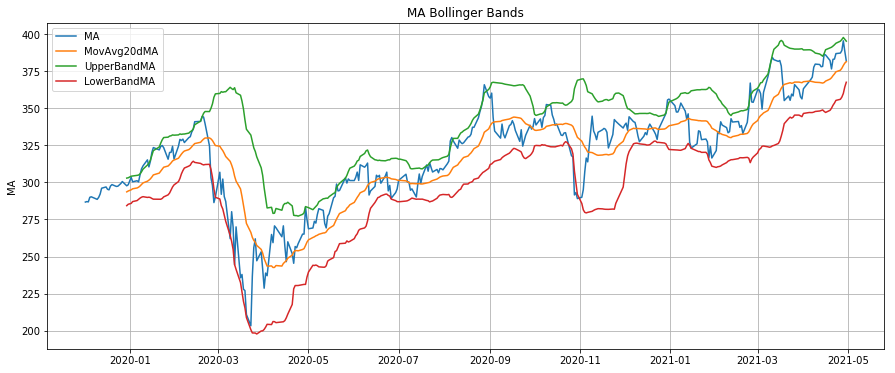

In [74]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandMA"] = stock_closing_prices_df["MovAvg20dMA"] + (stock_closing_prices_df["StDevMA"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandMA"] = stock_closing_prices_df["MovAvg20dMA"] - (stock_closing_prices_df["StDevMA"] * 2)

# Plotting
stock_closing_prices_df[["MA","MovAvg20dMA","UpperBandMA","LowerBandMA"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("MA Bollinger Bands")
plt.axis("tight")
plt.ylabel("MA")

Text(0, 0.5, 'NFLX')

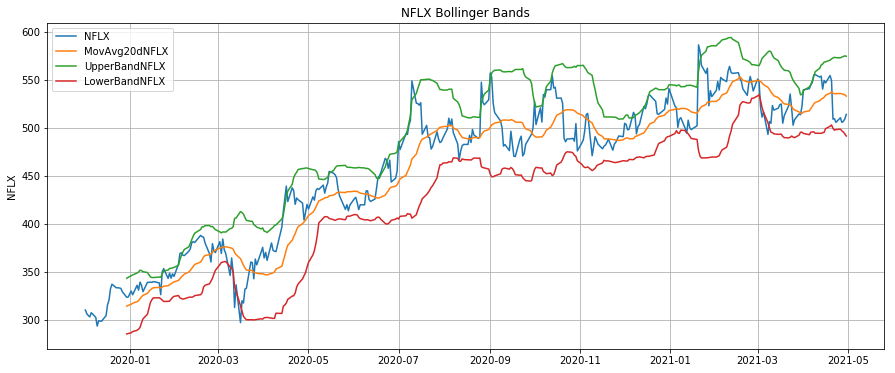

In [75]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandNFLX"] = stock_closing_prices_df["MovAvg20dNFLX"] + (stock_closing_prices_df["StDevNFLX"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandNFLX"] = stock_closing_prices_df["MovAvg20dNFLX"] - (stock_closing_prices_df["StDevNFLX"] * 2)

# Plotting
stock_closing_prices_df[["NFLX","MovAvg20dNFLX","UpperBandNFLX","LowerBandNFLX"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("NFLX Bollinger Bands")
plt.axis("tight")
plt.ylabel("NFLX")

Text(0, 0.5, 'XOM')

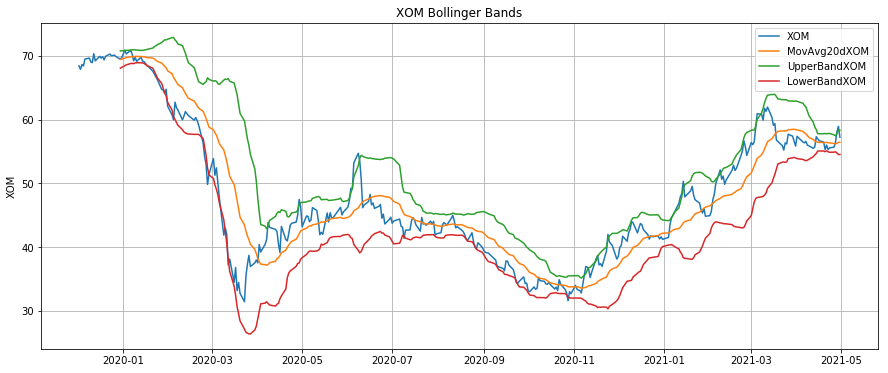

In [76]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandXOM"] = stock_closing_prices_df["MovAvg20dXOM"] + (stock_closing_prices_df["StDevXOM"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandXOM"] = stock_closing_prices_df["MovAvg20dXOM"] - (stock_closing_prices_df["StDevXOM"] * 2)

# Plotting
stock_closing_prices_df[["XOM","MovAvg20dXOM","UpperBandXOM","LowerBandXOM"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("XOM Bollinger Bands")
plt.axis("tight")
plt.ylabel("XOM")

In [77]:
stock_closing = pd.DataFrame()

stock_closing["MSFT"] = stock_df["MSFT"]["close"]
stock_closing["DIS"] = stock_df["DIS"]["close"]
stock_closing["NFLX"] = stock_df["NFLX"]["close"]
stock_closing["MA"] = stock_df["MA"]["close"]
stock_closing["XOM"] = stock_df["XOM"]["close"]

In [78]:
stock_returns = stock_closing.pct_change()

In [79]:
stock_returns = stock_returns.dropna()

In [80]:
stock_returns.head()

,MSFT,DIS,NFLX,MA,XOM
2019-12-03,-0.001538,-0.013930,-0.012548,0.001116,-0.007890
2019-12-04,0.003415,-0.002489,-0.006043,-0.000731,0.011046
2019-12-05,0.000601,-0.005598,-0.004634,0.010806,-0.003496
2019-12-06,0.012207,0.001356,0.014528,0.001172,0.015933
2019-12-09,-0.002570,-0.009956,-0.015591,-0.004409,0.002302


In [81]:
#Daily STD
stock_std = stock_returns.std()
stock_std

MSFT    0.024596
DIS     0.027506
NFLX    0.028559
MA      0.026856
XOM     0.030084
dtype: float64

In [82]:
stock_std_df = pd.DataFrame(list(stock_std.items()),columns = ['ticker','STD'])

In [83]:
stock_std_df

,ticker,STD
0,MSFT,0.024596
1,DIS,0.027506
2,NFLX,0.028559
3,MA,0.026856
4,XOM,0.030084


In [84]:
# Annualized STD
annualized_stock_std = stock_std * np.sqrt(252)
annualized_stock_std.sort_values(ascending=False)

XOM     0.477563
NFLX    0.453361
DIS     0.436641
MA      0.426324
MSFT    0.390452
dtype: float64

In [85]:
rolling_std = stock_returns.rolling(window=20).std()

In [86]:
rolling_std = rolling_std.dropna()

In [87]:
rolling_std.head()

,MSFT,DIS,NFLX,MA,XOM
2019-12-31,0.005724,0.008067,0.017691,0.005718,0.008981
2020-01-02,0.006897,0.009619,0.017725,0.006587,0.009346
2020-01-03,0.007879,0.009940,0.017944,0.007143,0.009378
2020-01-06,0.007861,0.009942,0.018794,0.006860,0.009418
2020-01-07,0.007976,0.009934,0.019193,0.006934,0.009059


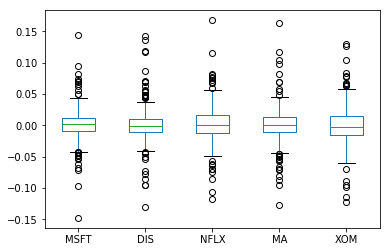

In [88]:
stock_returns.plot.box()

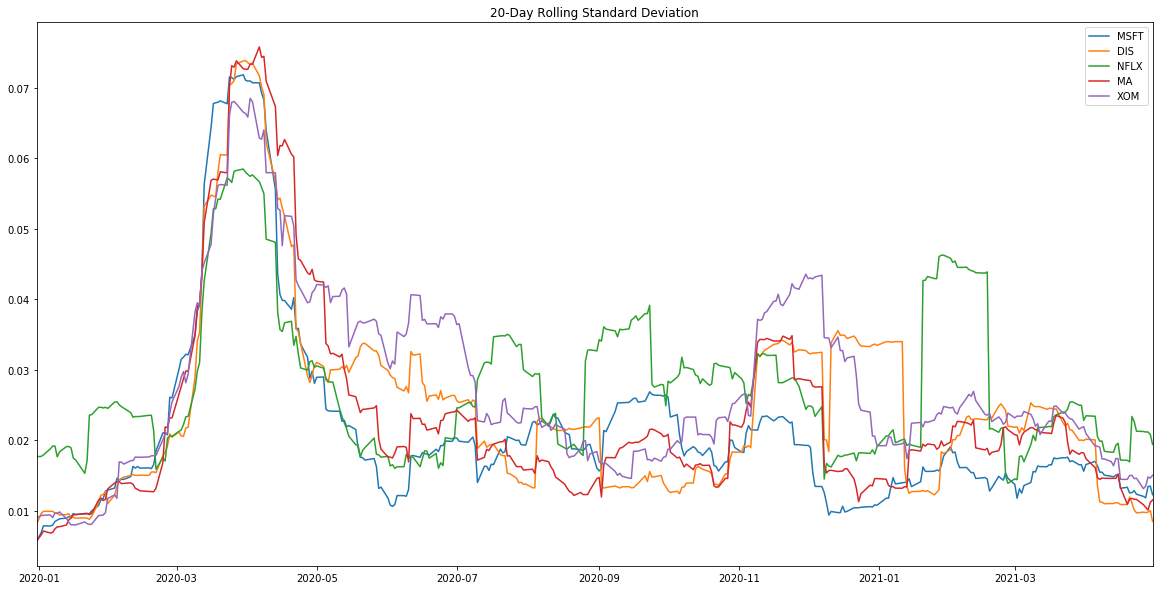

In [89]:
import hvplot.pandas
rolling_std.plot(figsize=(20,10), title="20-Day Rolling Standard Deviation")

In [90]:
rolling_std = rolling_std.copy()
rolling_std['Average'] = rolling_std.mean(numeric_only=True, axis=1)
rolling_std.head()

,MSFT,DIS,NFLX,MA,XOM,Average
2019-12-31,0.005724,0.008067,0.017691,0.005718,0.008981,0.009236
2020-01-02,0.006897,0.009619,0.017725,0.006587,0.009346,0.010035
2020-01-03,0.007879,0.009940,0.017944,0.007143,0.009378,0.010457
2020-01-06,0.007861,0.009942,0.018794,0.006860,0.009418,0.010575
2020-01-07,0.007976,0.009934,0.019193,0.006934,0.009059,0.010619


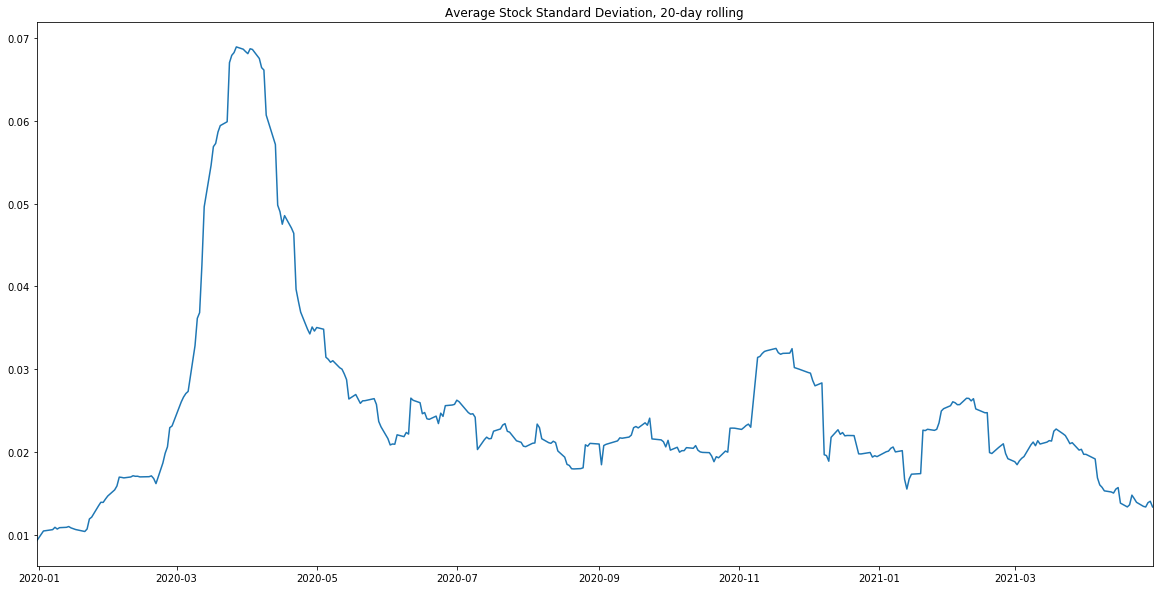

In [91]:
rolling_std['Average'].plot(figsize=(20,10), title="Average Stock Standard Deviation, 20-day rolling")

In [92]:
ada_path = Path("../crypto_data/ADA.csv")
btc_path = Path("../crypto_data/BTC.csv")
dog_path = Path("../crypto_data/DOG.csv")
eth_path = Path("../crypto_data/ETH.csv")
xrp_path = Path("../crypto_data/XRP.csv")

ada = pd.read_csv(ada_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
btc = pd.read_csv(btc_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
dog = pd.read_csv(dog_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
eth = pd.read_csv(eth_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
xrp = pd.read_csv(xrp_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

btc_close = btc["Close"]
xrp_close = xrp["Close"]

In [93]:
crypto = pd.concat([ada, btc_close, dog, eth, xrp_close], axis = "columns", join = "inner")

crypto.columns = ["ADA", "BTC", "DOG", "ETH", "XRP"]
crypto.head()

,ADA,BTC,DOG,ETH,XRP
Date,,,,,
2019-11-04,3.56,9412.612305,51.48,19.70,0.299937
2019-11-14,4.00,8708.094727,50.82,18.93,0.270391
2019-11-20,4.45,8027.268066,50.74,18.26,0.251364
2019-11-29,4.45,7761.243652,50.24,17.88,0.230217
2019-12-06,4.45,7546.996582,50.31,17.37,0.225505


In [94]:
crypto = crypto.copy()
crypto['AVG_Crypto'] = crypto.mean(numeric_only=True, axis=1)
crypto.head()

,ADA,BTC,DOG,ETH,XRP,AVG_Crypto
Date,,,,,,
2019-11-04,3.56,9412.612305,51.48,19.70,0.299937,1897.530448
2019-11-14,4.00,8708.094727,50.82,18.93,0.270391,1756.423024
2019-11-20,4.45,8027.268066,50.74,18.26,0.251364,1620.193886
2019-11-29,4.45,7761.243652,50.24,17.88,0.230217,1566.808774
2019-12-06,4.45,7546.996582,50.31,17.37,0.225505,1523.870417


In [95]:
crypto_rolling_std = crypto.rolling(window=20).std()

In [96]:
crypto_rolling_std.dropna().head()

,ADA,BTC,DOG,ETH,XRP,AVG_Crypto
Date,,,,,,
2020-02-14,1.196050,1002.507461,1.104167,1.441425,0.035176,200.401678
2020-02-18,1.280456,1046.655451,1.015192,1.438778,0.035006,209.196669
2020-02-19,1.353337,1071.048522,0.976263,1.473787,0.035339,214.065763
2020-02-20,1.419623,1079.934496,0.906674,1.512208,0.035900,215.851388
2020-02-27,1.460286,1054.946329,1.487253,1.660583,0.035789,210.862057


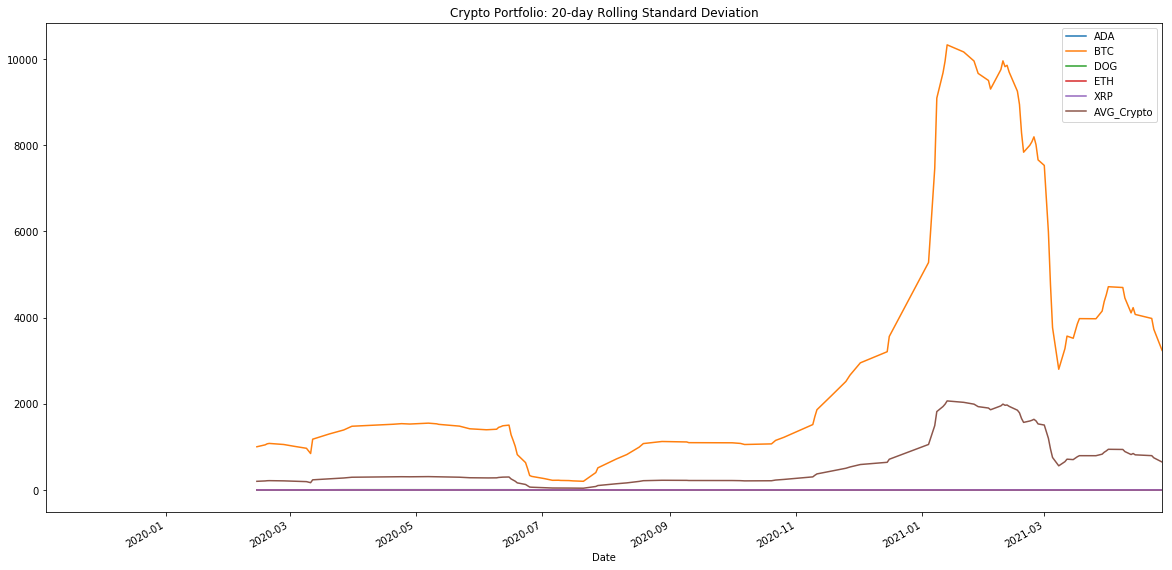

In [97]:
crypto_rolling_std.plot(figsize=(20, 10), title="Crypto Portfolio: 20-day Rolling Standard Deviation")

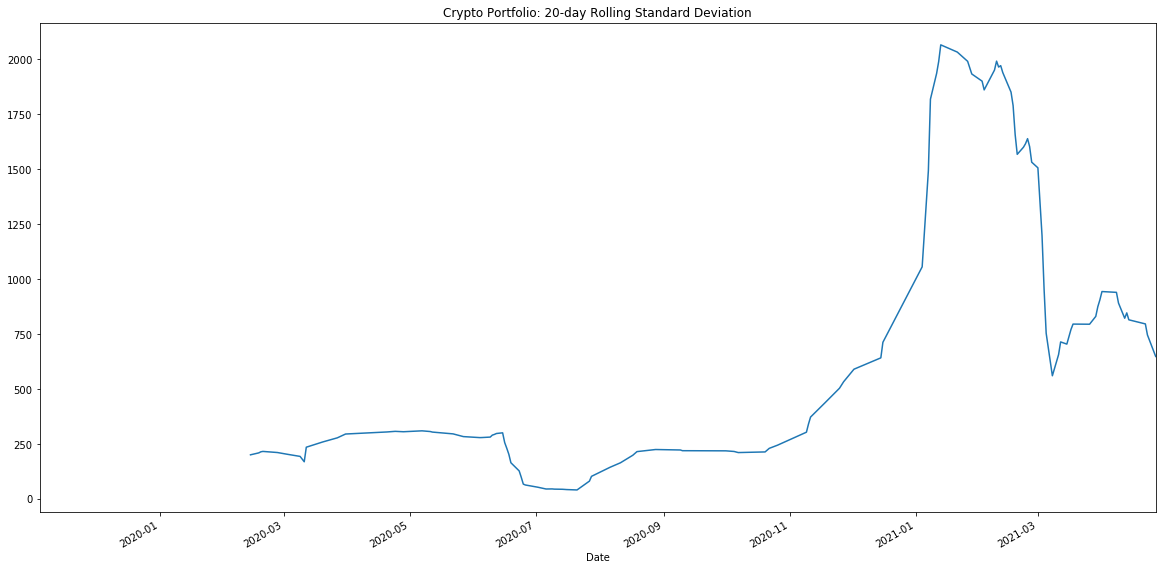

In [98]:
crypto_rolling_std["AVG_Crypto"].plot(figsize=(20, 10), title="Crypto Portfolio: 20-day Rolling Standard Deviation")

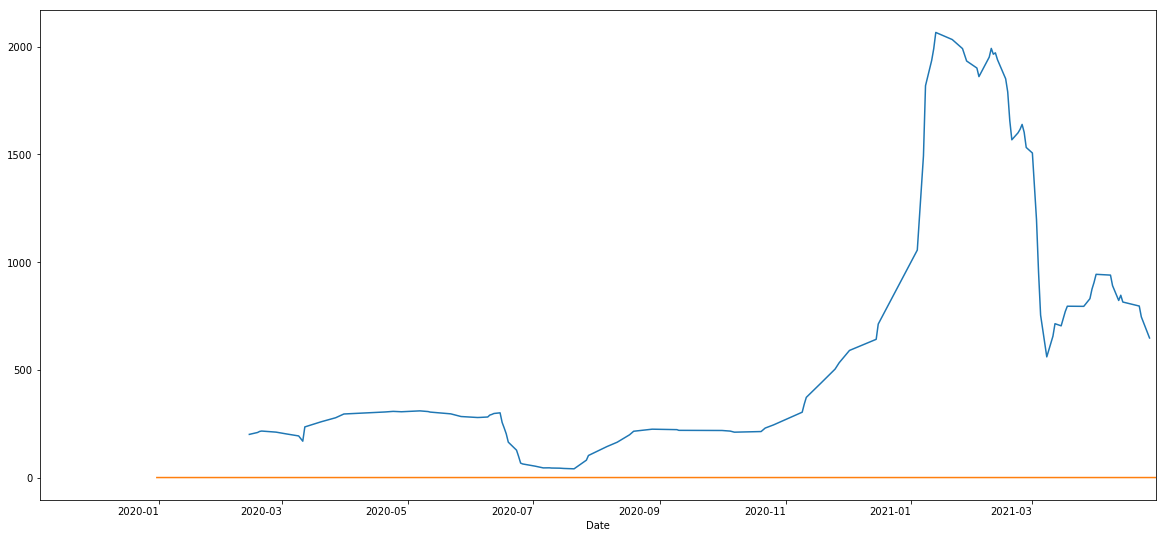

In [99]:
[crypto_rolling_std["AVG_Crypto"].plot(figsize=(20, 10))] + [rolling_std['Average'].plot(figsize=(20,10))]


In [100]:
#Beta



In [101]:
crypto.head()

,ADA,BTC,DOG,ETH,XRP,AVG_Crypto
Date,,,,,,
2019-11-04,3.56,9412.612305,51.48,19.70,0.299937,1897.530448
2019-11-14,4.00,8708.094727,50.82,18.93,0.270391,1756.423024
2019-11-20,4.45,8027.268066,50.74,18.26,0.251364,1620.193886
2019-11-29,4.45,7761.243652,50.24,17.88,0.230217,1566.808774
2019-12-06,4.45,7546.996582,50.31,17.37,0.225505,1523.870417


In [102]:
crypto_daily_returns = crypto.pct_change()
crypto_daily_returns.dropna().head()

,ADA,BTC,DOG,ETH,XRP,AVG_Crypto
Date,,,,,,
2019-11-14,0.123596,-0.074848,-0.012821,-0.039086,-0.098507,-0.074364
2019-11-20,0.112500,-0.078183,-0.001574,-0.035394,-0.070368,-0.077561
2019-11-29,0.000000,-0.033140,-0.009854,-0.020811,-0.084129,-0.032950
2019-12-06,0.000000,-0.027605,0.001393,-0.028523,-0.020468,-0.027405
2019-12-12,0.000000,-0.040263,-0.003975,0.023028,-0.025037,-0.039855


In [103]:
stock_returns = stock_returns.copy()
stock_returns['AVG_Stock'] = stock_returns.mean(numeric_only=True, axis=1)
stock_returns.head()

,MSFT,DIS,NFLX,MA,XOM,AVG_Stock
2019-12-03,-0.001538,-0.013930,-0.012548,0.001116,-0.007890,-0.006958
2019-12-04,0.003415,-0.002489,-0.006043,-0.000731,0.011046,0.001039
2019-12-05,0.000601,-0.005598,-0.004634,0.010806,-0.003496,-0.000464
2019-12-06,0.012207,0.001356,0.014528,0.001172,0.015933,0.009039
2019-12-09,-0.002570,-0.009956,-0.015591,-0.004409,0.002302,-0.006045


In [104]:
# Covariance of avg daily returns of crypto vs. stock
covariance = crypto_daily_returns['AVG_Crypto'].cov(stock_returns['AVG_Stock'])
covariance

0.0005318796171139125

In [105]:
csvpath = Path("SP500_PriceData - Sheet1 (3).csv")
sp500_df = pd.read_csv(csvpath)
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_returns_df = sp500_df.pct_change()
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "S&P 500"})

In [106]:
sp500_returns_df.dropna().head()

,S&P 500
Date,
2019-05-01 16:00:00,-0.007502
2019-05-02 16:00:00,-0.002124
2019-05-03 16:00:00,0.009638
2019-05-06 16:00:00,-0.004471
2019-05-07 16:00:00,-0.016512


In [107]:
sp500_returns_df.index = sp500_returns_df.index.date
sp500_returns_df

,S&P 500
2019-04-30,NaN
2019-05-01,-0.007502
2019-05-02,-0.002124
2019-05-03,0.009638
2019-05-06,-0.004471
2019-05-07,-0.016512
2019-05-08,-0.001605
2019-05-09,-0.003021
2019-05-10,0.003720
2019-05-13,-0.024131


In [108]:
sp500_returns_df.index = sp500_returns_df.index.date
crypto_daily_returns.index = crypto_daily_returns.index.date
combined_df = pd.concat([sp500_returns_df, stock_returns, crypto_daily_returns], axis='columns', join='inner')

AttributeError: 'Index' object has no attribute 'date'

In [ ]:
combined_df.head()

In [ ]:
rolling_covariance_stock = combined_df['AVG_Stock'].rolling(window=20).cov(combined_df['S&P 500'])
rolling_variance_stock = combined_df['AVG_Stock'].rolling(window=20).var()
beta_stock = rolling_covariance_stock / rolling_variance_stock

beta_stock.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Stock Portfolio to the S&P 500')

In [ ]:
rolling_covariance_crypto = combined_df['AVG_Crypto'].rolling(window=20).cov(combined_df['S&P 500'])
rolling_variance_crypto = combined_df['AVG_Crypto'].rolling(window=20).var()
beta_crypto = rolling_covariance_crypto / rolling_variance_crypto

beta_crypto.plot(figsize=(20, 10), title='Rolling 20-Day Beta of Crypto Portfolio to the S&P 500')

In [ ]:
beta_crypto.plot(figsize=(20, 10), title='Rolling 20-Day Beta of Crypto Portfolio to the S&P 500')
beta_stock.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Stock Portfolio to the S&P 500')

In [ ]:
import seaborn as sns 
correlation = combined_df.corr()
sns.heatmap(correlation)

In [ ]:
combined_rolling_std = combined_df.rolling(window=20).std()
combined_rolling_std.plot(figsize=(20,10), title="20-Day Rolling Standard Deviation")

In [ ]:
combined_df.head()